In [18]:
#Installing necessary libraries
!pip install networkx
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
#Importing necessary libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Sampling first 200 nodes to create a subgraph

l=[]
with open('facebook_combined.txt') as f:
    for line in f:
        il=line.split(" ")
        il[-1]=il[-1][:-1]
        il=list(tuple(map(int,il)))
        l.append(il)
        
print('First 10 edges in the network: ')
print(l[:10])


refined_l=[]
for i in l:
    if i[0]<200 and i[1]<200:
        refined_l.append(i)

nodes=[]
for i in refined_l:
    nodes.append(i[0])
    nodes.append(i[1])
    
nodes=sorted(set(nodes))

G=nx.Graph()

for i in nodes:
    G.add_node(i)

edges=[]
for i in refined_l:
    edges.append((i[0],i[1]))
        
G.add_edges_from(edges)

First 10 edges in the network: 
[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]


In [3]:
#Information about the subgraph
nx.info(G)

C:\Users\nikit\AppData\Local\Temp\ipykernel_9032\1172774694.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 200 nodes and 962 edges'

In [4]:
type=nx.is_directed(G)
print('Is the graph directed? ',type)

Is the graph directed?  False


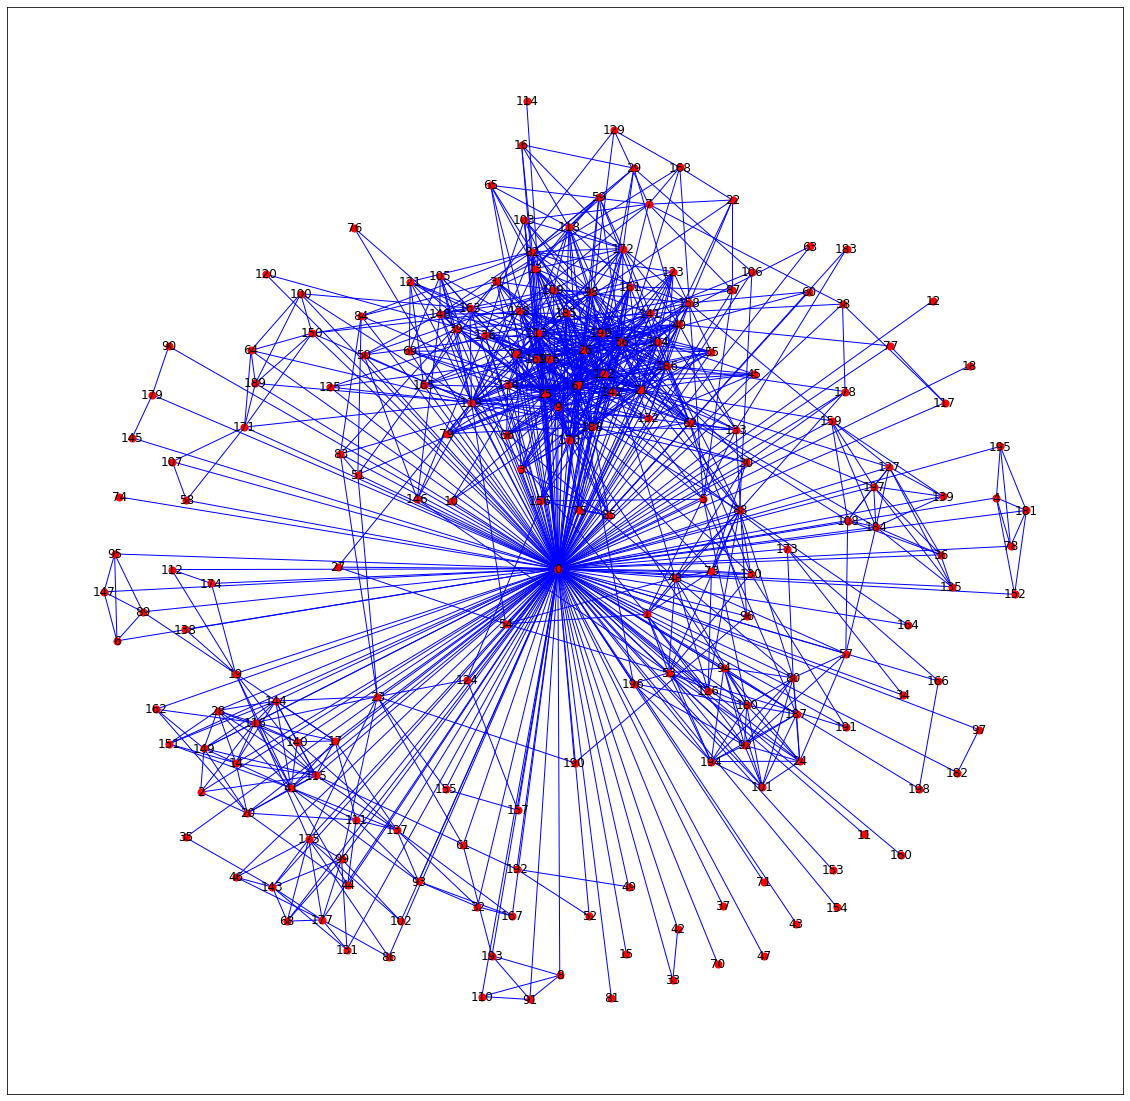

In [5]:
#Visualizing the Graph

plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=.1)
nx.draw_networkx(G, pos, node_size=50, node_color='red', with_labels=True, edge_color='blue')
plt.savefig("graph_visualization.png")
plt.show()

The average degree is 9.62


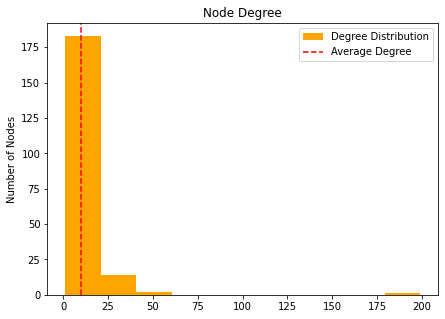

In [6]:
#Degree Distribution

degree = nx.degree(G)

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

plt.figure(figsize=(7,5))
plt.hist(degree_list,label='Degree Distribution',color='orange')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Node Degree')
plt.savefig("degree.png")

The global clustering coefficient is 0.6563925617700275


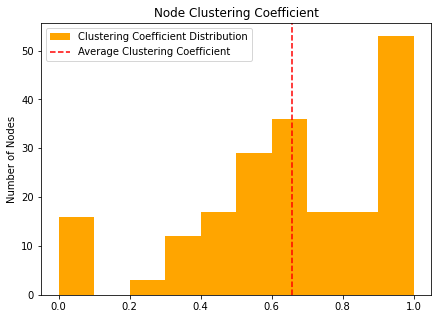

In [7]:
#Clustering Coefficient Distribution

clustering_coefficient = nx.clustering(G)

clustering_list = []

for (n,c) in clustering_coefficient.items():
    clustering_list.append(c)

av_clustering_coefficient = sum(clustering_list) / len(clustering_list)

print('The global clustering coefficient is ' + str(av_clustering_coefficient))

plt.figure(figsize=(7,5))
plt.hist(clustering_list,label='Clustering Coefficient Distribution',color='orange')
plt.axvline(av_clustering_coefficient,color='r',linestyle='dashed',label='Average Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Node Clustering Coefficient')
plt.savefig("clustering_coefficient.png")

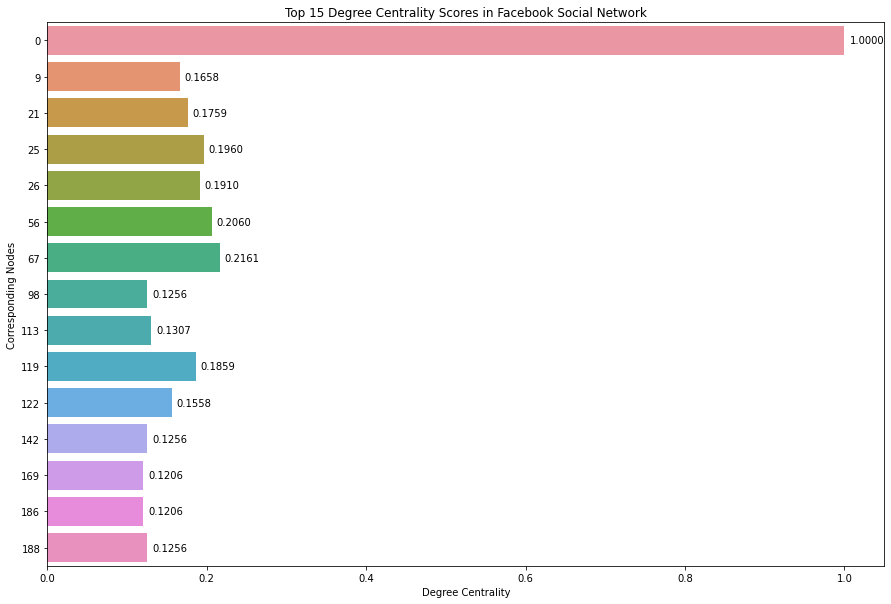

In [8]:
#Degree Centrality

deg_cent = nx.degree_centrality(G)
name = []
deg_val = []

for key, value in deg_cent.items():
    name.append(key)
    deg_val.append(value)


dc = pd.DataFrame()    
dc['name'] = name
dc['deg_val'] = deg_val
dc = dc.sort_values(by='deg_val', ascending=False)


plt.figure(figsize=(15, 10))
ax = sns.barplot(x='deg_val', y='name', data=dc[:15], orient='h')
plt.xlabel('Degree Centrality')
plt.ylabel('Corresponding Nodes')
plt.title('Top 15 Degree Centrality Scores in Facebook Social Network')
           
for p in ax.patches:
   ax.annotate("%.4f" % p.get_width(), xy = (p.get_width(), p.get_y() + p.get_height() / 2), xytext = (5, 0),
               textcoords = 'offset points', ha = "left", va = "center")

plt.savefig("degree_centrality.png")
plt.show()

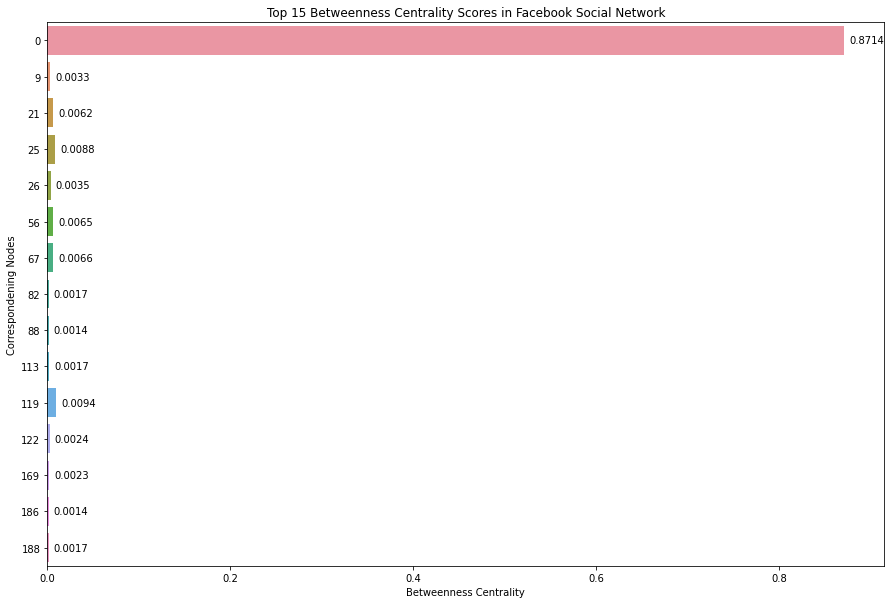

In [9]:
#Betweenness Centrality

bet_cent = nx.betweenness_centrality(G)
name = []
bet_val = []

for key, value in bet_cent.items():
    name.append(key)
    bet_val.append(value)

bc = pd.DataFrame()
bc['name'] = name
bc['bet_val'] = bet_val
bc = bc.sort_values(by='bet_val', ascending=False)

    
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='bet_val', y='name', data=bc[:15], orient='h')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Correspondening Nodes')
plt.title('Top 15 Betweenness Centrality Scores in Facebook Social Network')
           
for p in ax.patches:
   ax.annotate("%.4f" % p.get_width(), xy = (p.get_width(), p.get_y() + p.get_height() / 2), xytext = (5, 0),
               textcoords = 'offset points', ha = "left", va = "center")

plt.savefig("betweenness_centrality.png")
plt.show()

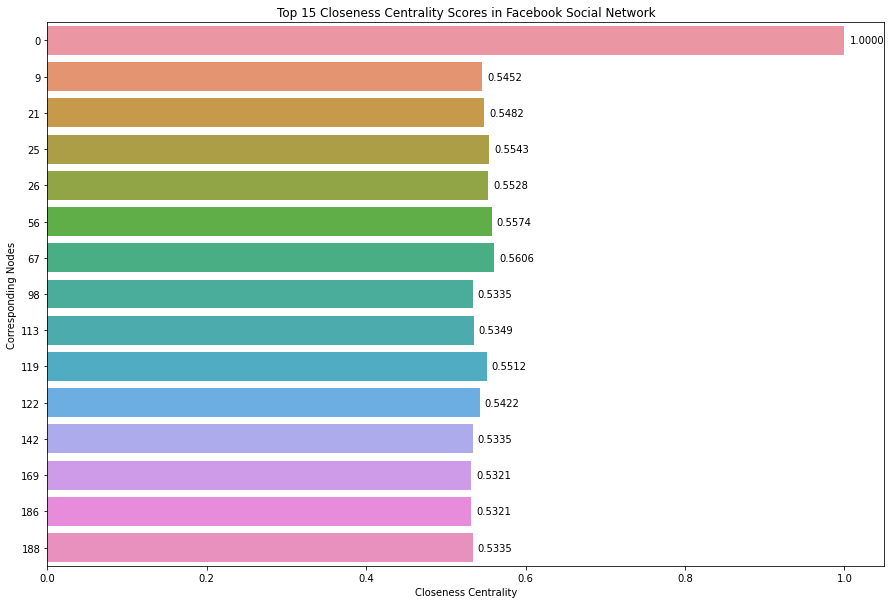

In [10]:
#Closeness Centrality

close_cent = nx.closeness_centrality(G)
name = []
close_val = []

for key, value in close_cent.items():
    name.append(key)
    close_val.append(value)

cc = pd.DataFrame()
cc['name'] = name
cc['close_val'] = close_val
cc = cc.sort_values(by='close_val', ascending=False)

    
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='close_val', y='name', data=cc[:15], orient='h')
plt.xlabel('Closeness Centrality')
plt.ylabel('Corresponding Nodes')
plt.title('Top 15 Closeness Centrality Scores in Facebook Social Network')
           
for p in ax.patches:
   ax.annotate("%.4f" % p.get_width(), xy = (p.get_width(), p.get_y() + p.get_height() / 2), xytext = (5, 0),
               textcoords = 'offset points', ha = "left", va = "center")

plt.savefig("closeness_centrality.png")
plt.show()

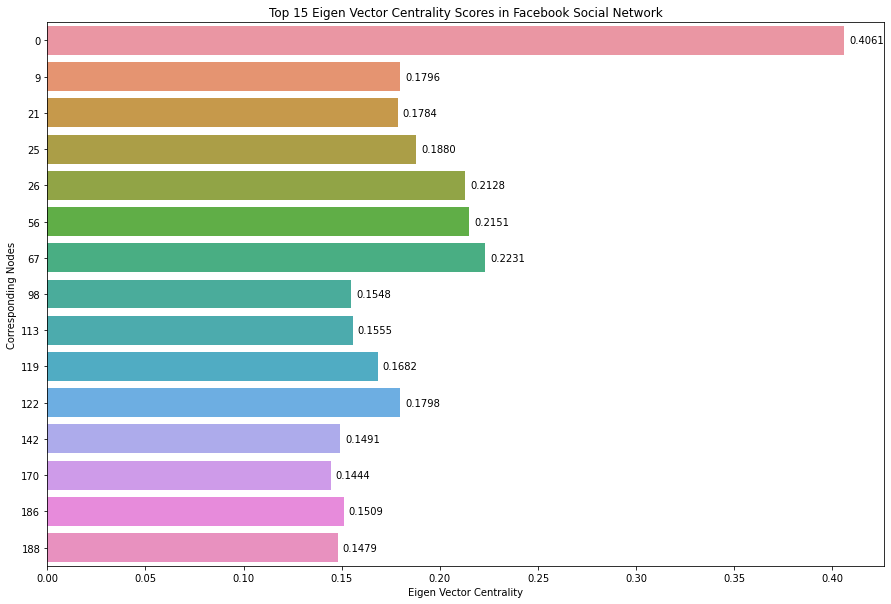

In [11]:
#Eigen Vector Centrality

eigen_cent = nx.eigenvector_centrality(G)
name = []
eigen_val = []

for key, value in eigen_cent.items():
    name.append(key)
    eigen_val.append(value)

ev = pd.DataFrame()
ev['name'] = name
ev['eigen_val'] = eigen_val
ev = ev.sort_values(by='eigen_val', ascending=False)

    
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='eigen_val', y='name', data=ev[:15], orient='h')
plt.xlabel('Eigen Vector Centrality')
plt.ylabel('Corresponding Nodes')
plt.title('Top 15 Eigen Vector Centrality Scores in Facebook Social Network')
           
for p in ax.patches:
   ax.annotate("%.4f" % p.get_width(), xy = (p.get_width(), p.get_y() + p.get_height() / 2), xytext = (5, 0),
               textcoords = 'offset points', ha = "left", va = "center")

plt.savefig("eigen_vector_centrality.png")
plt.show()

In [12]:
#Community Detection using Greedy Modularity Method

from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print('Number of communities detected: ',len(c))

Number of communities detected:  9


In [13]:
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])
community_3 = sorted(c[3])
community_4 = sorted(c[4])
community_5 = sorted(c[5])
community_6 = sorted(c[6])
community_7 = sorted(c[7])
community_8 = sorted(c[8])

print(community_0)
print(community_1)
print(community_2)
print(community_3)
print(community_4)
print(community_5)
print(community_6)
print(community_7)
print(community_8)

[0, 1, 11, 12, 15, 18, 24, 27, 30, 33, 34, 37, 38, 42, 43, 47, 48, 49, 50, 52, 53, 54, 57, 58, 63, 64, 70, 71, 73, 74, 76, 77, 80, 81, 88, 90, 92, 94, 97, 100, 101, 107, 114, 117, 119, 120, 125, 126, 130, 145, 146, 150, 153, 154, 160, 163, 164, 166, 171, 173, 178, 179, 180, 182, 187, 189, 191, 192, 194, 196, 198]
[3, 5, 7, 9, 10, 13, 16, 21, 22, 25, 26, 29, 31, 39, 40, 45, 55, 56, 59, 60, 62, 65, 66, 67, 69, 72, 75, 79, 82, 85, 87, 98, 103, 104, 105, 106, 109, 113, 118, 121, 122, 123, 128, 129, 132, 134, 136, 141, 142, 148, 156, 158, 161, 165, 168, 169, 170, 172, 176, 185, 186, 188, 199]
[2, 14, 17, 19, 20, 23, 28, 32, 35, 41, 44, 46, 68, 86, 93, 99, 102, 111, 112, 115, 116, 124, 131, 137, 138, 140, 143, 144, 149, 151, 155, 157, 162, 167, 174, 175, 177]
[36, 108, 127, 135, 139, 159, 184, 197]
[8, 61, 91, 110, 193]
[4, 78, 152, 181, 195]
[6, 89, 95, 147]
[96, 133, 183, 190]
[51, 83, 84]


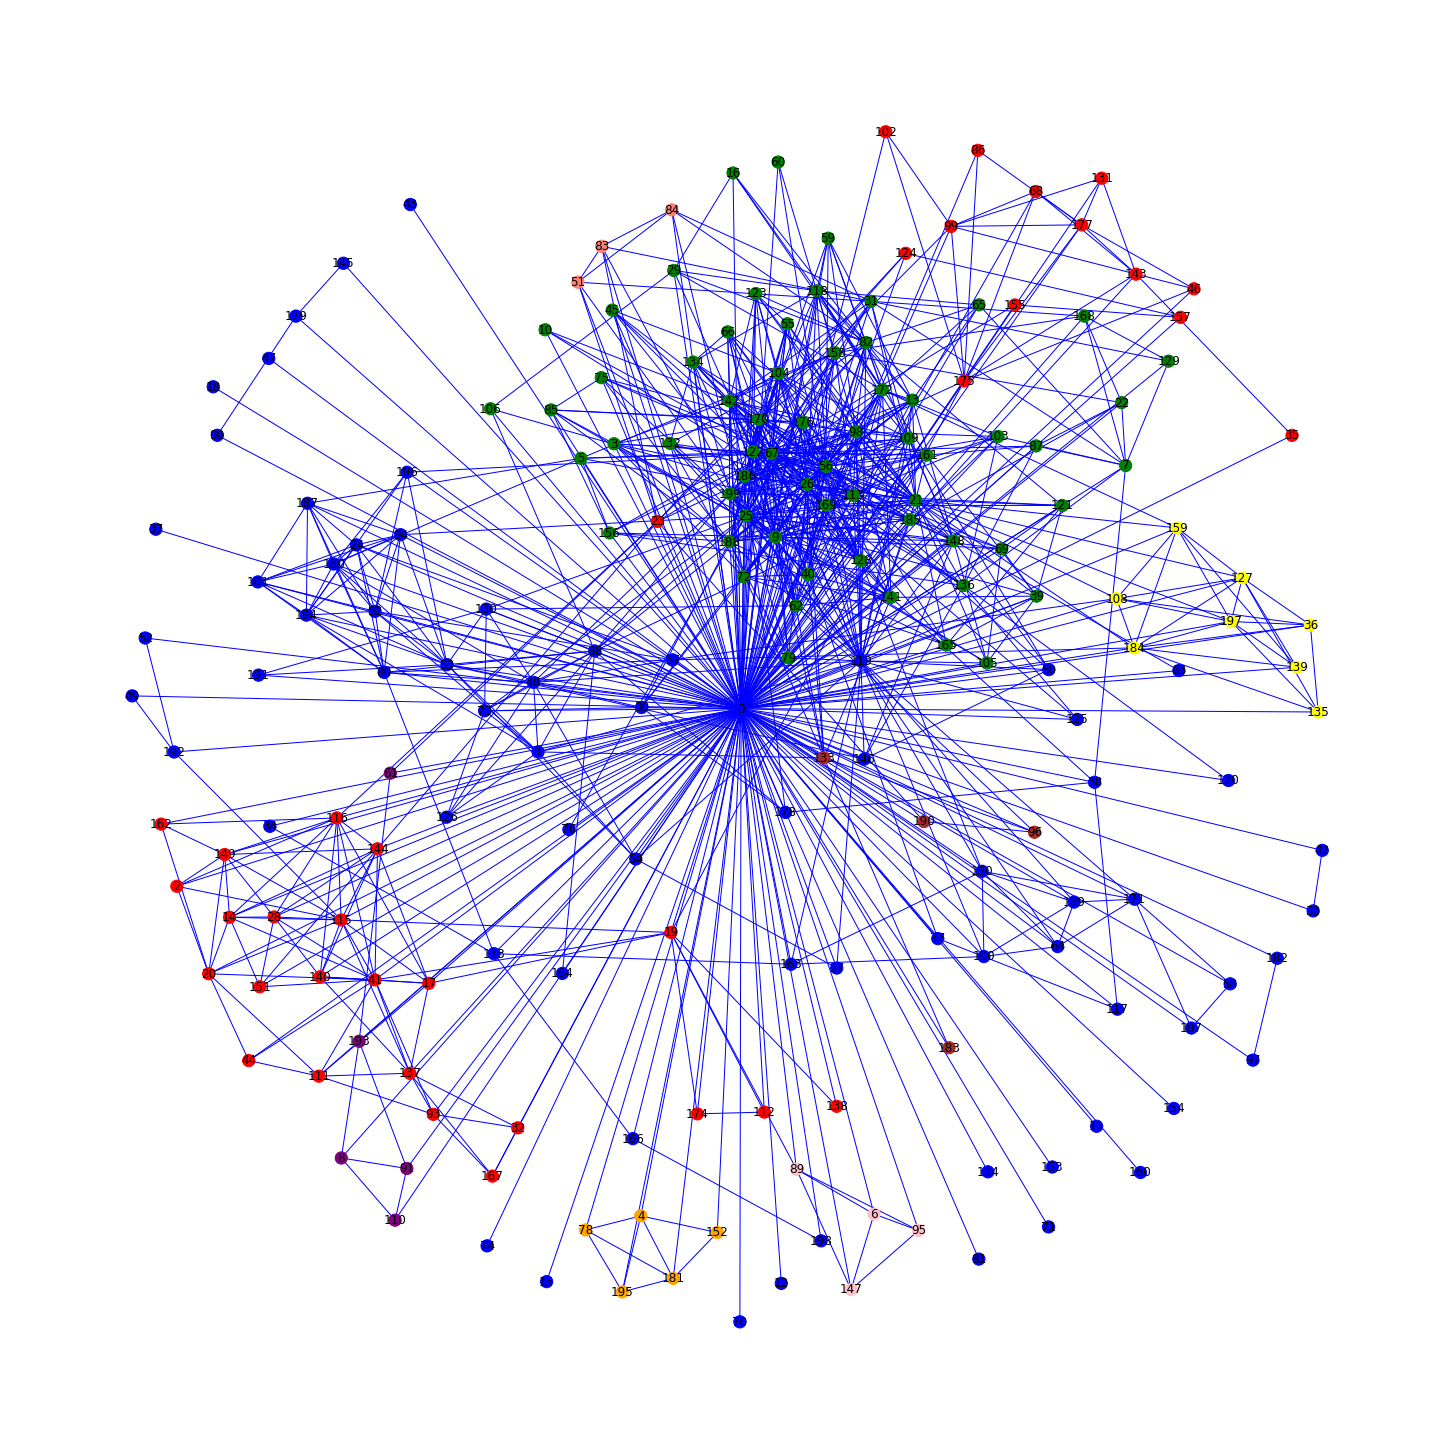

In [14]:
color_map = []
for node in G:
    if node in community_0:
        color_map.append('blue')
    elif node in community_1: 
        color_map.append('green')
    elif node in community_2: 
        color_map.append('red')
    elif node in community_3: 
        color_map.append('yellow')
    elif node in community_4: 
        color_map.append('purple')
    elif node in community_5: 
        color_map.append('orange')
    elif node in community_6: 
        color_map.append('pink')
    elif node in community_7: 
        color_map.append('brown')
    else: 
        color_map.append('salmon')




plt.figure(figsize=(20,20))
nx.draw(G, node_size=150, node_color=color_map, with_labels=True, edge_color='blue')

plt.savefig("greedy_modularity_method.png")
plt.show()

In [15]:
#Community Detection using Clique Percolation Method

from networkx.algorithms.community import k_clique_communities


c = list(k_clique_communities(G,6))

print('Number of communities detected: ',len(c))

Number of communities detected:  9


In [16]:
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])
community_3 = sorted(c[3])
community_4 = sorted(c[4])
community_5 = sorted(c[5])
community_6 = sorted(c[6])
community_7 = sorted(c[7])
community_8 = sorted(c[8])

print(community_0)
print(community_1)
print(community_2)
print(community_3)
print(community_4)
print(community_5)
print(community_6)
print(community_7)
print(community_8)

[0, 1, 48, 73, 88, 126]
[0, 14, 17, 28, 41, 115, 116, 137, 140, 144, 149, 151]
[0, 16, 29, 82, 118, 172]
[0, 24, 53, 80, 92, 94, 101, 180, 187, 194, 196]
[0, 21, 36, 108, 127, 135, 139, 159, 184, 197]
[0, 3, 9, 13, 21, 25, 26, 31, 39, 40, 45, 55, 56, 59, 62, 66, 67, 69, 72, 75, 79, 82, 85, 88, 98, 103, 104, 105, 109, 113, 118, 119, 122, 123, 128, 132, 134, 136, 141, 142, 148, 156, 158, 161, 169, 170, 172, 176, 185, 186, 188, 199]
[0, 25, 31, 51, 83, 84]
[0, 64, 100, 119, 150, 171, 189]
[0, 68, 99, 143, 175, 177]


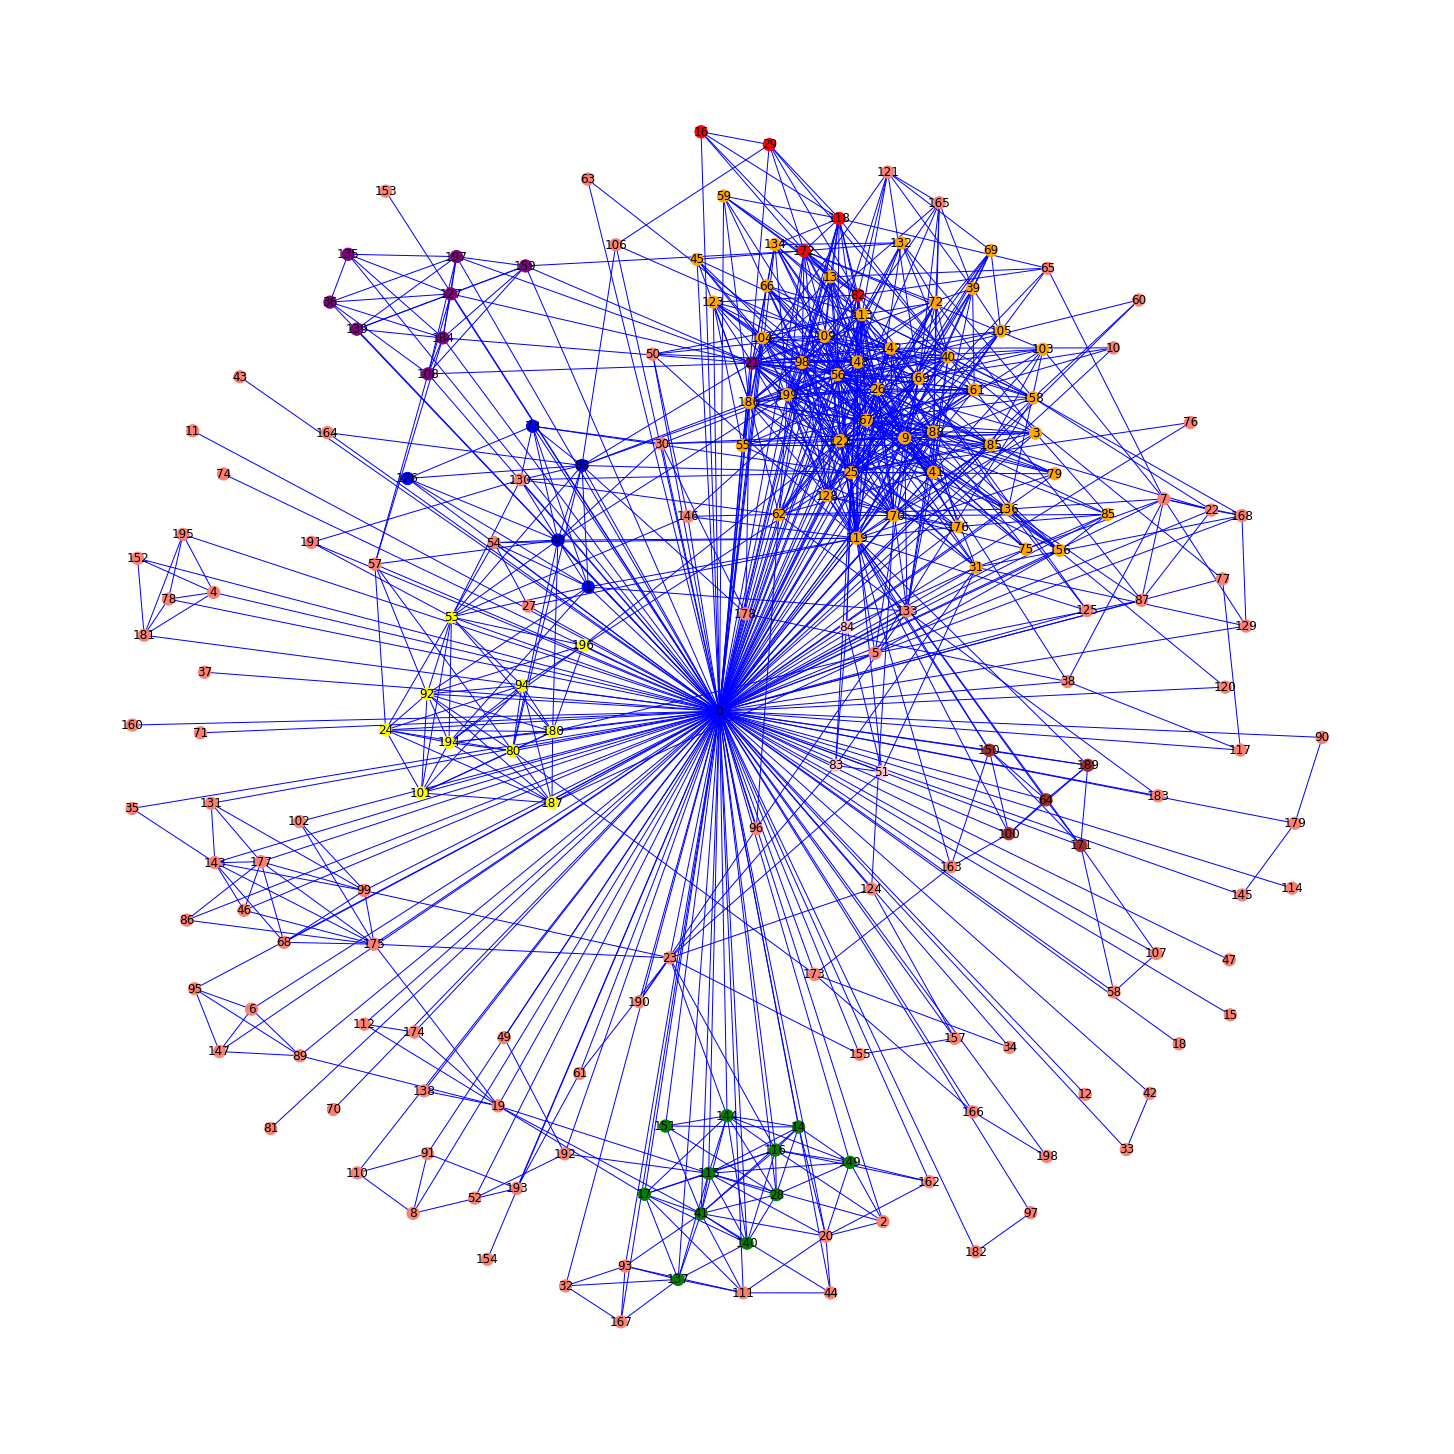

In [17]:
color_map = []
for node in G:
    if node in community_0:
        color_map.append('blue')
    elif node in community_1: 
        color_map.append('green')
    elif node in community_2: 
        color_map.append('red')
    elif node in community_3: 
        color_map.append('yellow')
    elif node in community_4: 
        color_map.append('purple')
    elif node in community_5: 
        color_map.append('orange')
    elif node in community_6: 
        color_map.append('pink')
    elif node in community_7: 
        color_map.append('brown')
    else: 
        color_map.append('salmon')




plt.figure(figsize=(20,20))
nx.draw(G, node_size=150, node_color=color_map, with_labels=True, edge_color='blue')

plt.savefig("clique_percolation_method.png")
plt.show()
